# ANALYSIS USING FEATURE SELECTION AND MACHINE LEARNING ALGORITHMS

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [63]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
df = pd.read_csv("improved_ecommerce_dataset.csv")

## Exploratory Data Analysis (EDA)

In [67]:
df.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57


   ## Check data information

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            500 non-null    object 
 1   Brand               500 non-null    object 
 2   Product_Name        500 non-null    object 
 3   Rating              500 non-null    int64  
 4   Condition           500 non-null    object 
 5   Num_Reviews         500 non-null    int64  
 6   Stock               500 non-null    int64  
 7   Material_Quality    500 non-null    object 
 8   Warranty_Months     500 non-null    int64  
 9   Delivery_Time_Days  500 non-null    int64  
 10  Discount_Percent    500 non-null    int64  
 11  Popularity_Score    500 non-null    float64
 12  Price               500 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 50.9+ KB


In [70]:
df.describe()

,Rating,Num_Reviews,Stock,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2.994000,507.642000,47.646000,4.21800,7.280000,24.216000,15.179800,64965.637060
std,1.413492,290.829878,29.645478,7.33936,3.954349,14.450293,12.094746,117200.765227
min,1.000000,2.000000,1.000000,0.00000,1.000000,0.000000,0.020000,370.480000
25%,2.000000,252.000000,21.000000,0.00000,4.000000,11.000000,5.520000,2518.965000
50%,3.000000,524.000000,47.000000,0.00000,7.000000,25.000000,11.580000,10643.535000
75%,4.000000,766.500000,74.000000,6.00000,11.000000,36.000000,22.710000,45812.545000
max,5.000000,998.000000,99.000000,24.00000,14.000000,49.000000,48.700000,583894.830000


## Check the uniqueness of the categorical feattures

In [73]:
df.columns

Index(['Category', 'Brand', 'Product_Name', 'Rating', 'Condition', 'Num_Reviews', 'Stock', 'Material_Quality', 'Warranty_Months', 'Delivery_Time_Days', 'Discount_Percent', 'Popularity_Score', 'Price'], dtype='object')

In [74]:
df["Category"].unique()

array(['Stationery', 'Clothes', 'Phone', 'Utensils'], dtype=object)

In [75]:
df["Brand"].unique()

array(['Faber-Castell', 'Uniqlo', 'Adidas', 'Nike', 'Tecno', 'Samsung',
       'Pilot', 'Hawkins', 'Pigeon', 'Bic', 'Tefal', 'Cuisinart', 'Zara',
       'Prestige', 'H&M', 'Paper Mate', 'Xiaomi', 'Infinix', 'Staples',
       'Apple'], dtype=object)

In [76]:
df["Product_Name"].unique()

array(['Notebook', 'Jeans', 'Jacket', 'Hoodie', 'Redmi Note 11', 'Ruler',
       'Frying Pan', 'Cooking Pot', 'Stapler', 'Ball Pen', 'Kettle',
       'T-Shirt', 'Camon 20', 'Marker', 'Hot 30', 'Cutlery Set',
       'Pressure Cooker', 'Sneakers', 'Galaxy A23', 'iPhone 13'],
      dtype=object)

In [77]:
df["Condition"].unique()

array(['Used', 'New'], dtype=object)

In [78]:
df["Material_Quality"].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [79]:
df["Delivery_Time_Days"].unique()

array([11,  6, 10, 12,  5,  2,  3, 14,  9,  7,  8, 13,  1,  4],
      dtype=int64)

## Check the missing value before splitting the data

In [81]:
df.isnull().sum()

Category              0
Brand                 0
Product_Name          0
Rating                0
Condition             0
Num_Reviews           0
Stock                 0
Material_Quality      0
Warranty_Months       0
Delivery_Time_Days    0
Discount_Percent      0
Popularity_Score      0
Price                 0
dtype: int64

## Check the duplicate and shape before splitting data

In [86]:
df.duplicated().sum()

0

In [89]:
df.shape

(500, 13)

# Visualization and Explanations.

## Correlation Heatmap (for numeric variables)

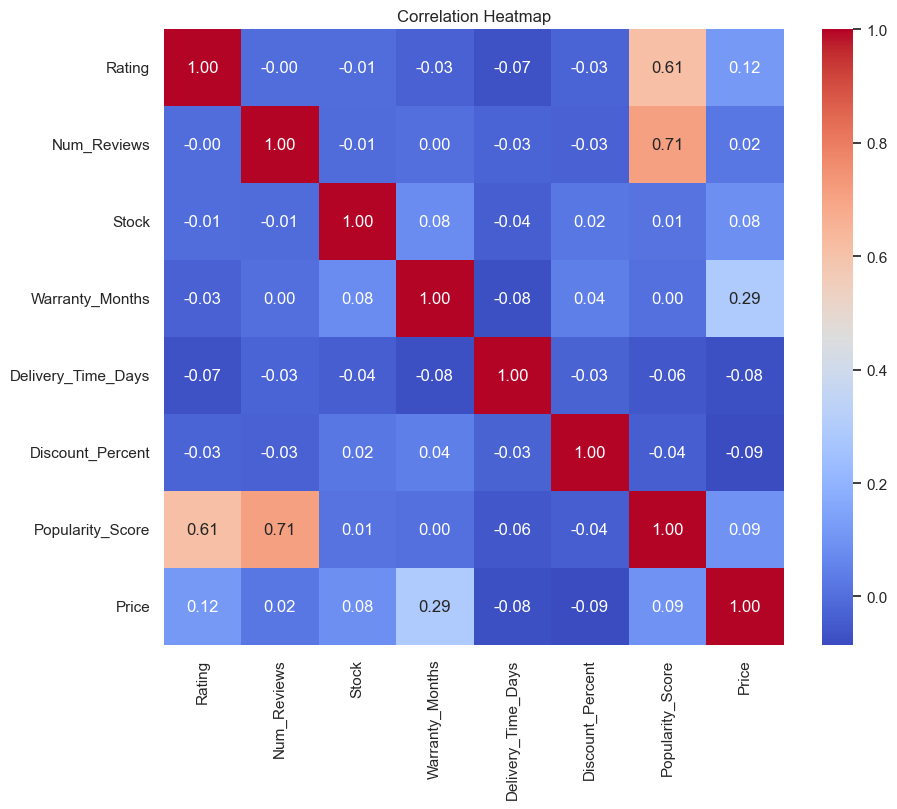

In [102]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##  **Correlation Heatmap Insights**

In [29]:
Price is strongly correlated with:

Popularity_Score (positive)

Warranty_Months (positive, but weaker)

Discount_Percent is weakly negatively correlated with Price (higher discount, lower price — expected).


 **Actionable Tip**:

Popularity Score is crucial — invest in improving it (better images, reviews, marketing) to command higher prices.

SyntaxError: invalid character '—' (U+2014) (3973535169.py, line 7)

## Scatter plots for key continuous variables vs Price

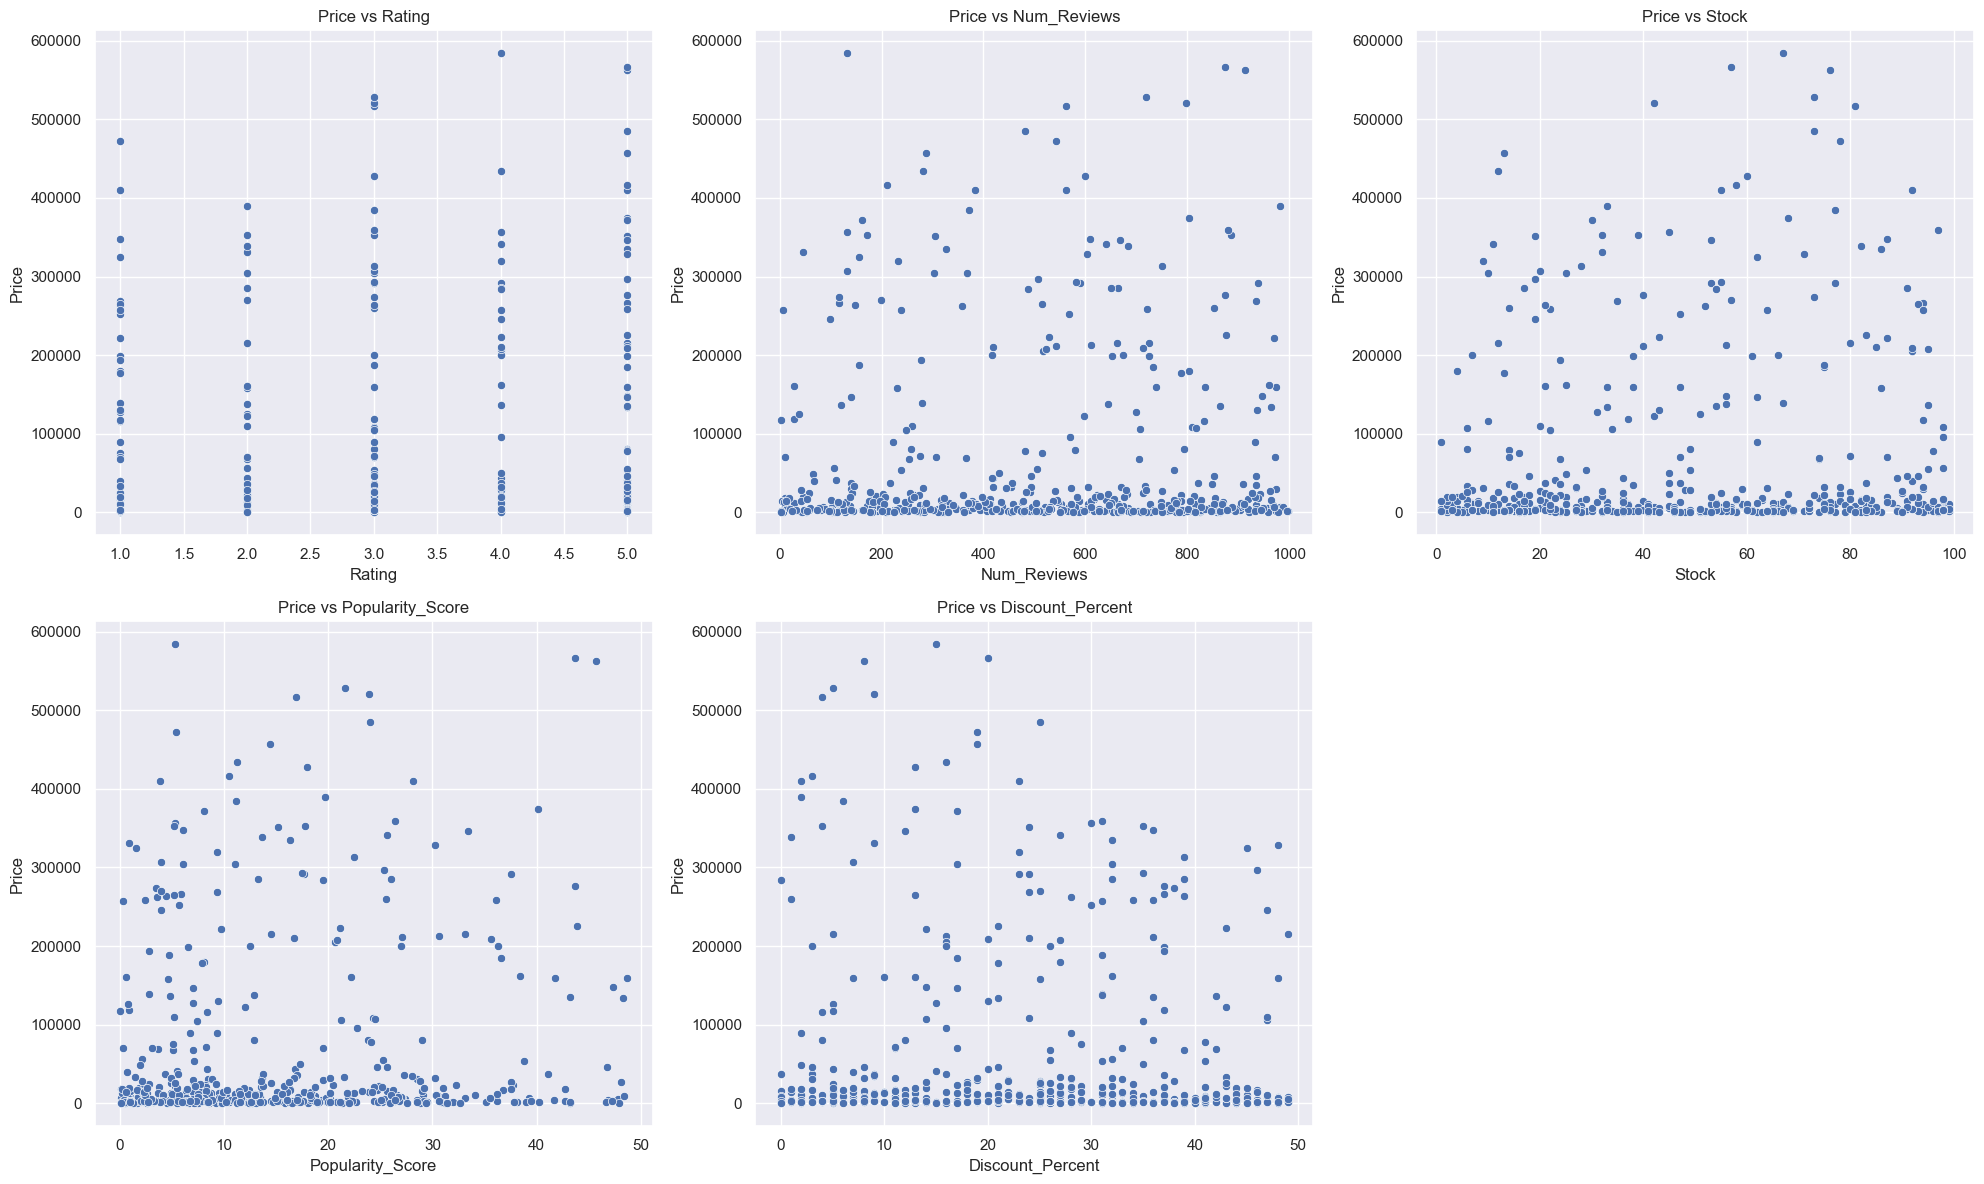

In [104]:

continuous_vars = ['Rating', 'Num_Reviews', 'Stock', 'Popularity_Score', 'Discount_Percent']

plt.figure(figsize=(20, 12))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y='Price')
    plt.title(f'Price vs {var}')

plt.tight_layout()
plt.show()

## Scatter plots: Numeric Features vs Price

In [ ]:

Rating: No clear pattern (not a strong predictor alone).

Num_Reviews: Slight positive trend — popular products can charge more.

Stock: No strong relationship.

Popularity_Score: Clear positive trend — higher Popularity, higher Price.

Discount_Percent: Slight negative trend — bigger discounts lower price.
    

 Actionable Tip:

Focus on building features around popularity, discounts, and category-specific behaviors for better models.

## Boxplots for categorical variables vs Price

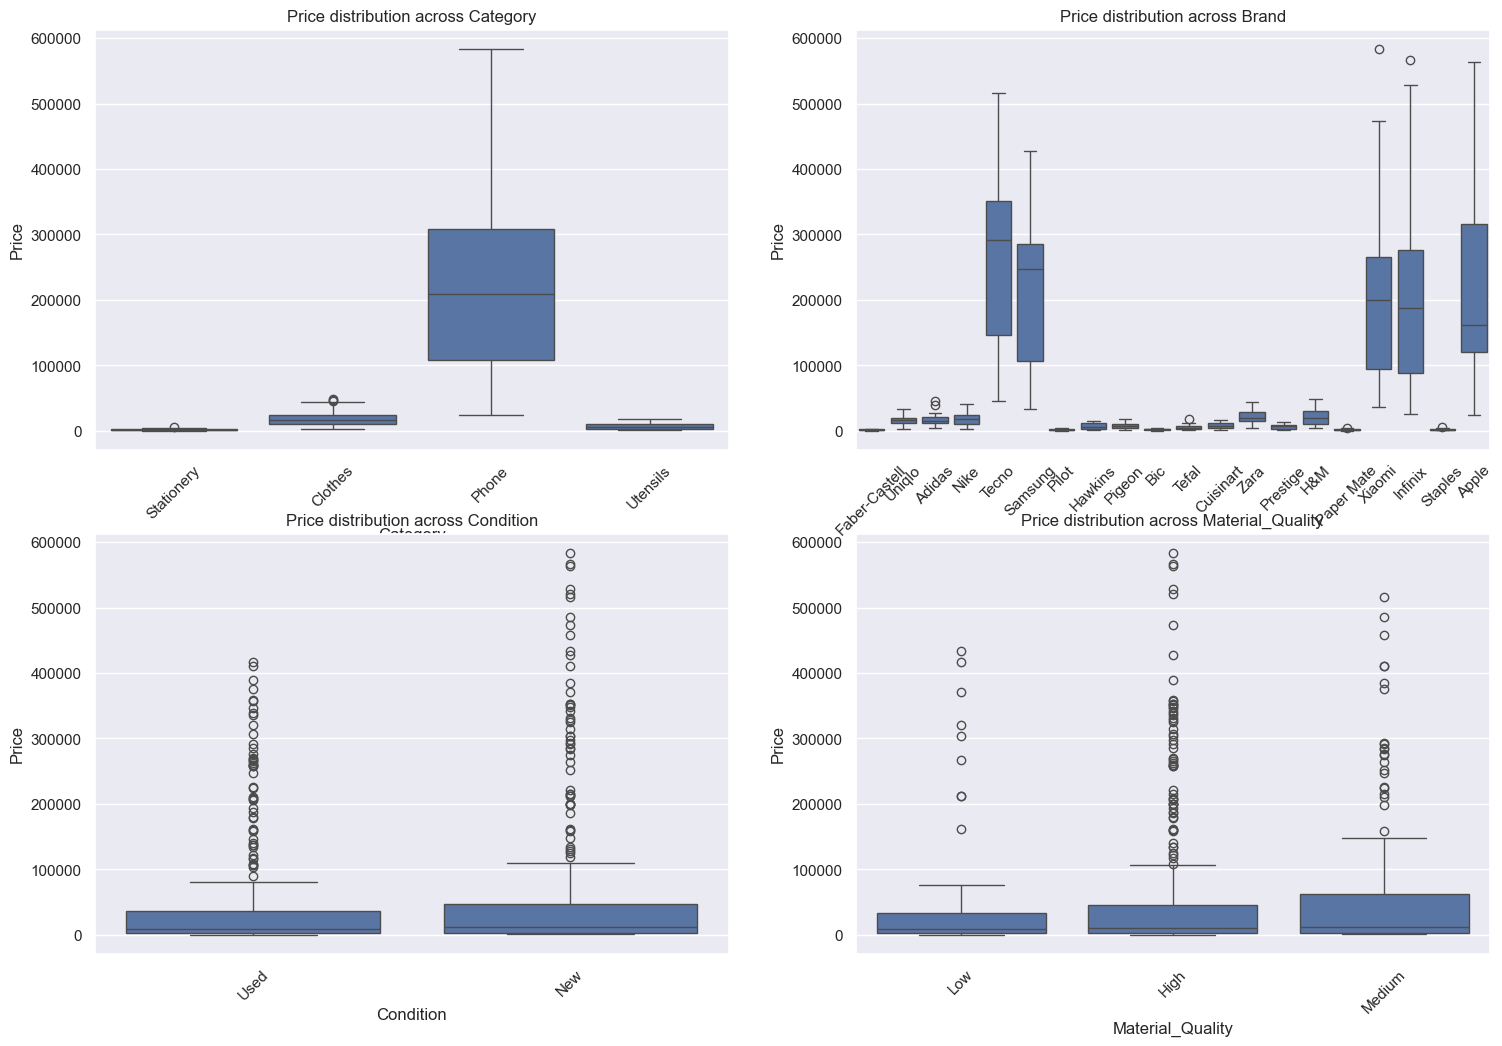

In [107]:

categorical_vars = ['Category', 'Brand', 'Condition', 'Material_Quality']

plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=var, y='Price')
    plt.xticks(rotation=45)
    plt.title(f'Price distribution across {var}')

## Boxplots: Categorical Features vs Price

In [ ]:
Category: Phones and Electronics have much higher prices than Clothes or Stationery.

Brand: Premium brands (like Apple, Samsung) cluster at higher prices compared to others.

Condition: New products are priced much higher than Used.

Material Quality: High material quality drives higher prices compared to Medium or Low.

 
    Actionable Tip:

Segment the price prediction model based on Category, Brand, and Condition.
One-size-fits-all models might not perform well!

## Summary of EDA Findings

In [ ]:
To improve e-commerce price prediction, you should:

Focus heavily on Popularity_Score and Category.

Use different models or feature engineering for different product types.

Include Brand reputation and Condition in the model.

Carefully handle outliers (very expensive items can skew predictions).

Consider Warranty length as an indicator of price premium for some categories.



## Split Data for Train and Test

In [110]:
X = df.drop("Price", axis=1)  
y = df["Price"]  

In [112]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=123)


In [113]:
print(df.shape)
print(train.shape)
print(test.shape)

(500, 13)
(400, 13)
(100, 13)


In [116]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
199,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
450,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
231,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
95,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
54,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
476,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
322,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
382,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Reset the train index

In [119]:
train.reset_index(drop=True, inplace=True)

In [121]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
1,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
2,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
3,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
4,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
396,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
397,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
398,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Check the data type

In [123]:
train.dtypes

Category               object
Brand                  object
Product_Name           object
Rating                  int64
Condition              object
Num_Reviews             int64
Stock                   int64
Material_Quality       object
Warranty_Months         int64
Delivery_Time_Days      int64
Discount_Percent        int64
Popularity_Score      float64
Price                 float64
dtype: object

In [125]:
train.columns

Index(['Category', 'Brand', 'Product_Name', 'Rating', 'Condition', 'Num_Reviews', 'Stock', 'Material_Quality', 'Warranty_Months', 'Delivery_Time_Days', 'Discount_Percent', 'Popularity_Score', 'Price'], dtype='object')

## Check the missing values after the data

In [127]:
train.isnull().sum()

Category              0
Brand                 0
Product_Name          0
Rating                0
Condition             0
Num_Reviews           0
Stock                 0
Material_Quality      0
Warranty_Months       0
Delivery_Time_Days    0
Discount_Percent      0
Popularity_Score      0
Price                 0
dtype: int64

## Check the dupliactes after splitting the data

In [132]:
train.duplicated().sum()

0

## Check and remove the outliers

In [135]:
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data = data[data[var] < upper]
    data = data[data[var] > lower]
    data.reset_index(drop=True, inplace=True)
    return data

## Plot boxplot for the 'Price' column before removing outliers

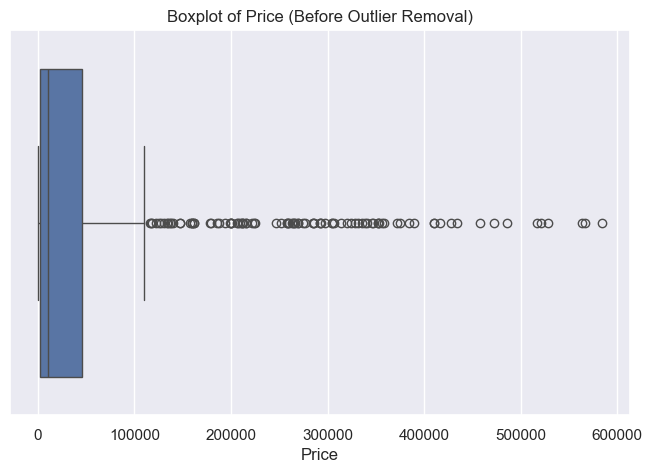

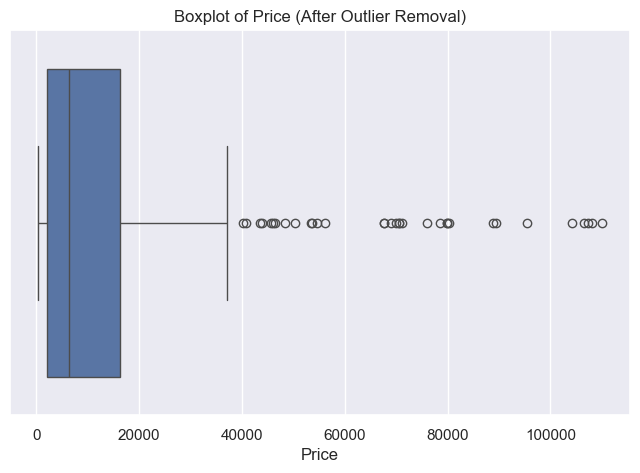

Original rows: 500, Rows after outlier removal: 403


In [138]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price (Before Outlier Removal)')
plt.show()

# Compute IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Plot boxplot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Price'])
plt.title('Boxplot of Price (After Outlier Removal)')
plt.show()

# Optional: See how many rows were removed
print(f"Original rows: {len(df)}, Rows after outlier removal: {len(df_no_outliers)}")


In [140]:
train = drop_outlier(train, "Price")

In [142]:
train.shape

(318, 13)

## Split data into features and targets

In [145]:
target = "Price"
X_train = train.drop(target, axis=1)    # Features
y_train = train[target]                 # Target

In [147]:
X_train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54
...,...,...,...,...,...,...,...,...,...,...,...,...
313,Stationery,Bic,Marker,3,Used,240,42,High,0,8,41,7.20
314,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47
315,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08
316,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66


In [149]:
y_train

0       2482.30
1       8585.11
2       1971.96
3       1434.76
4       4715.80
         ...   
313     2207.48
314     1787.39
315     4356.42
316    13125.90
317     6481.97
Name: Price, Length: 318, dtype: float64

In [151]:
df

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothes,Nike,Jacket,1,Used,264,92,High,0,13,5,2.64,20096.89
496,Stationery,Pilot,Ball Pen,2,Used,575,90,High,0,10,35,11.50,1093.01
497,Stationery,Bic,Stapler,5,New,53,16,High,0,8,7,2.65,1636.19
498,Clothes,H&M,Sneakers,5,New,605,94,High,0,10,11,30.25,32539.61


## Features Engineering

In [154]:
#FE 1.
X_train["Price_per_Review"] = round(y_train / X_train["Num_Reviews"], 2)


In [156]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52


In [158]:
#FE 2.
X_train["Discount_Amount"] = round((X_train["Discount_Percent"] / 100) * y_train, 2)

In [160]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05


In [162]:
#FE 3.
X_train["Popularity_Per_Review"] = round(X_train["Popularity_Score"] / X_train["Num_Reviews"], 2)

In [164]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount,Popularity_Per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28,0.02
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90,0.01
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07,0.04
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21,0.05
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05,0.02


## Dropping Unnecessary Columns

In [167]:
X_train.drop(["Num_Reviews"], axis=1, inplace=True)
X_train.drop(["Discount_Percent"], axis=1, inplace=True)


## Data Transformation

In [170]:
cat_feat = []
for i in X_train.columns:
    if X_train[i].dtypes == "O":
        cat_feat.append(i)

num_feat = []
for i in X_train.columns:
    if X_train[i].dtype == "int64" or X_train[i].dtype == "float64":
        num_feat.append(i)

## Categorical Features

In [173]:
cat_feat

['Category', 'Brand', 'Product_Name', 'Condition', 'Material_Quality']

## Numerical Features

In [176]:
num_feat

['Rating',
 'Stock',
 'Warranty_Months',
 'Delivery_Time_Days',
 'Popularity_Score',
 'Price_per_Review',
 'Discount_Amount',
 'Popularity_Per_Review']

## Correlation Heatmap of Numerical Features


<Axes: >

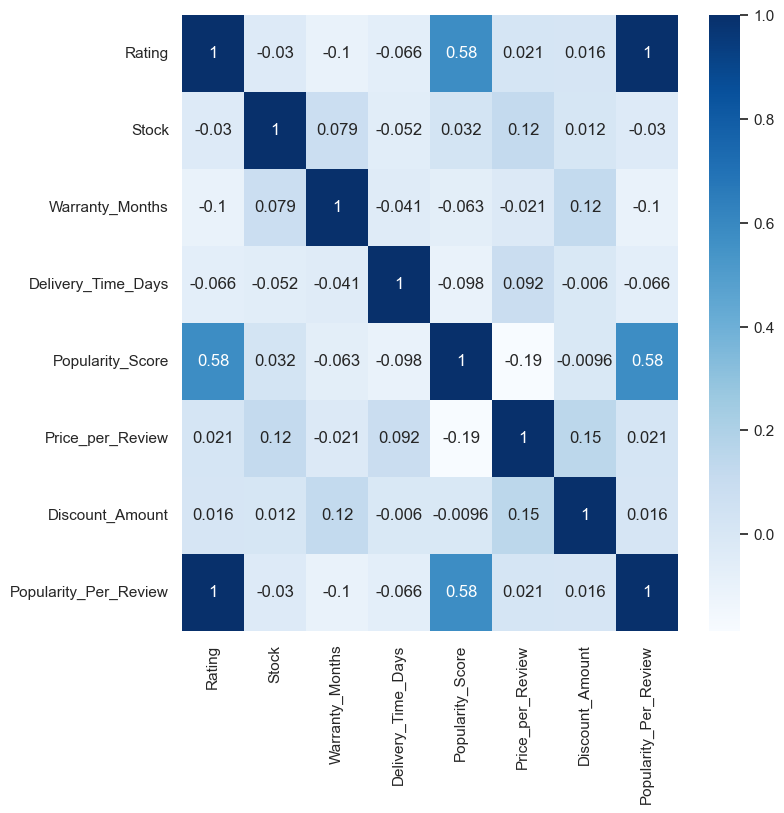

In [179]:
plt.figure(figsize = (8,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot=True, cmap = "Blues")

# Features Encoding

In [182]:
#A12
# If column is ordinal use label encoding (Ordinal encoder)
# If column is norminal use onehotencoding (One Hot encoder)

encoder = OneHotEncoder(drop= "first", dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat_feat, axis=1, inplace=True)


## To aviod data leakage

In [185]:
X_train.drop("Popularity_Score", axis=1, inplace=True)

## Features Importance

In [188]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = X_train.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Category_Phone,0.586228
Price_per_Review,0.219174
Discount_Amount,0.095241
Category_Utensils,0.025746
Delivery_Time_Days,0.023169
Warranty_Months,0.015899
Category_Stationery,0.006759
Stock,0.005759
Condition_Used,0.003807
Rating,0.002980


In [190]:
res = coef.to_frame()
res.head(5).index

Index(['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Category_Utensils', 'Delivery_Time_Days'], dtype='object')

In [192]:
top_5 = ['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Category_Utensils', 'Delivery_Time_Days']

In [193]:
X_train_n = X_train[top_5]

In [194]:
X_train_n

,Category_Phone,Price_per_Review,Discount_Amount,Category_Utensils,Delivery_Time_Days
0,0,2.82,521.28,0,5
1,0,50.21,3519.90,0,11
2,0,7.83,276.07,0,8
3,0,4.43,215.21,0,8
4,0,7.52,613.05,1,11
...,...,...,...,...,...
313,0,9.20,905.07,0,8
314,0,2.11,857.95,1,5
315,0,5.21,1263.36,1,11
316,0,71.73,4331.55,0,7


## Prepare X_train for X_test

In [196]:
def prepare(d):
    
    d.reset_index(drop=True, inplace=True)

    d = drop_outlier(d, "Price")
    
    target = "Price"
    X_d = d.drop(target, axis=1)    # Features
    y_d = d[target]   

    if "Num_Reviews" in X_d.columns:
        X_d["Price_per_Review"] = round(y_d / X_d["Num_Reviews"], 2)

    if "Discount_Percent" in X_d.columns:
        X_d["Discount_Amount"] = round((X_d["Discount_Percent"] / 100) * y_d, 2)

    if "Popularity_Score" in X_d.columns and "Num_Reviews" in X_d.columns:
        X_d["Popularity_Per_Review"] = round(X_d["Popularity_Score"] / X_d["Num_Reviews"], 2)

    X_d.drop(["Num_Reviews"], axis=1, inplace=True)
    X_d.drop(["Discount_Percent"], axis=1, inplace=True)

    
    encoder = OneHotEncoder(drop= "first", dtype=int)

    enc_data = pd.DataFrame(encoder.fit_transform(X_d[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_d = X_d.join(enc_data)

    X_d.drop(cat_feat, axis=1, inplace=True)

    X_d.drop("Popularity_Score", axis=1, inplace=True)

    X_d_n = X_d[top_5]

    return X_d_n, y_d

In [201]:
X_test, y_test = prepare(test)

## Model Evaluaton

In [204]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
  if input_ml_algo == 'DT':
     model = DecisionTreeRegressor()
  elif input_ml_algo == 'RF':
     model = RandomForestRegressor()
  elif input_ml_algo == 'XGBC':
     model = XGBRegressor()
  elif input_ml_algo=='LR':
     model=LinearRegression()
  elif input_ml_algo=='KNN':
    model=KNeighborsRegressor()
  elif input_ml_algo=='GBR':
     model= GradientBoostingRegressor()
  return model

def evaluate(model):
  y_train_pred = model.predict(X_train_n) #Train (Already seen this)
  y_pred = model.predict(X_test)
  print('Train r2 score: ', r2_score(y_train,y_train_pred))
  print('Test r2 score: ', r2_score(y_test, y_pred))

  print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
  print('test_mse1: ', mean_squared_error(y_test,y_pred))
  plt.subplots(figsize=(8,5))
  plt.scatter(y_test,y_pred)
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))
  (np.unique(y_test)),c='r')
  plt.title('Predicted vs Actual')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.grid()
  plt.show()


## Call the Algorithms

Train r2 score:  1.0
Test r2 score:  0.691316872366195
train_mse1:  0.0
test_mse1:  226742747.6902427


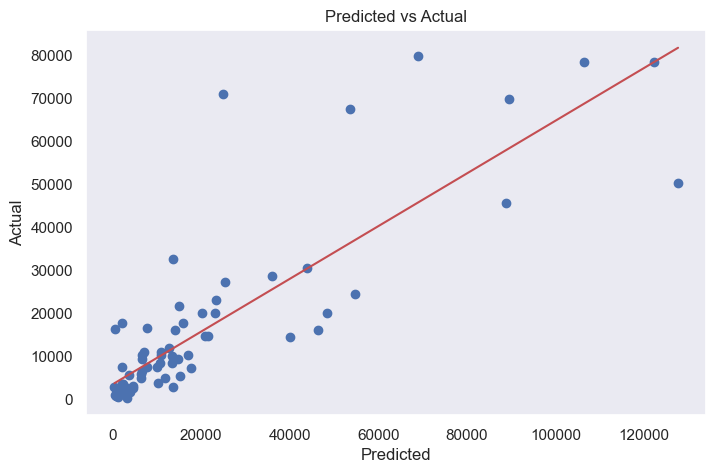

In [207]:
model1 = model_to_use("DT")
model1.fit(X_train_n, y_train)
evaluate(model1)

Train r2 score:  0.9675165123194257
Test r2 score:  0.7472963772175356
train_mse1:  8182075.523029057
test_mse1:  185623082.86881432


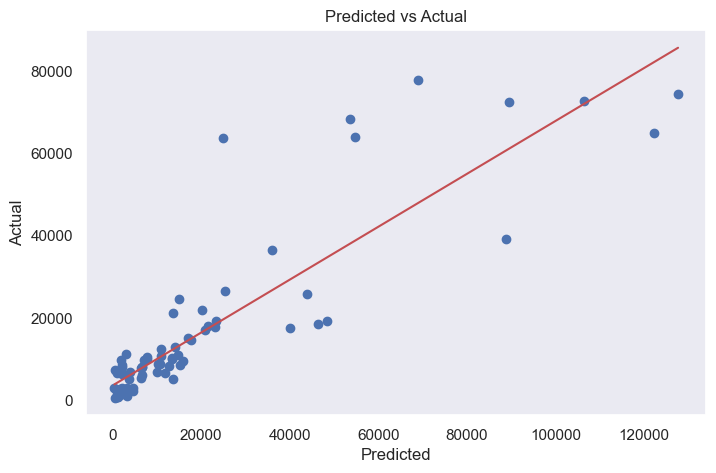

In [209]:
model2 = model_to_use("RF")
model2.fit(X_train_n, y_train)
evaluate(model2)

Train r2 score:  0.9999826439292673
Test r2 score:  0.6875316743721619
train_mse1:  4371.719038132204
test_mse1:  229523159.43576849


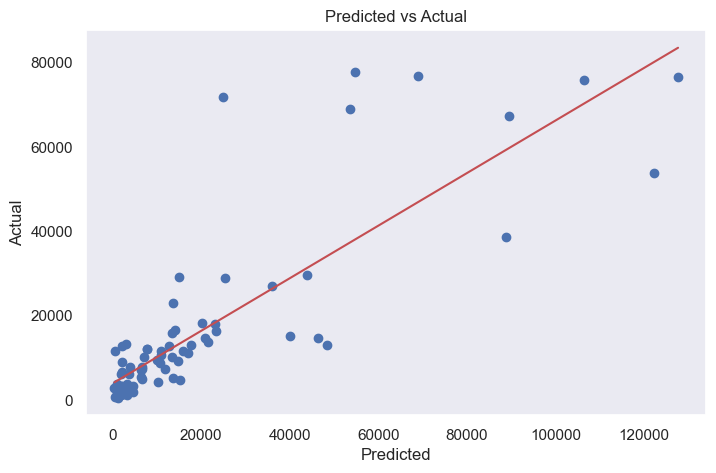

In [211]:
model3 = model_to_use("XGBC")
model3.fit(X_train_n, y_train)
evaluate(model3)

Train r2 score:  0.7438606705670356
Test r2 score:  0.7652623955983306
train_mse1:  64517436.010783754
test_mse1:  172426169.89225706


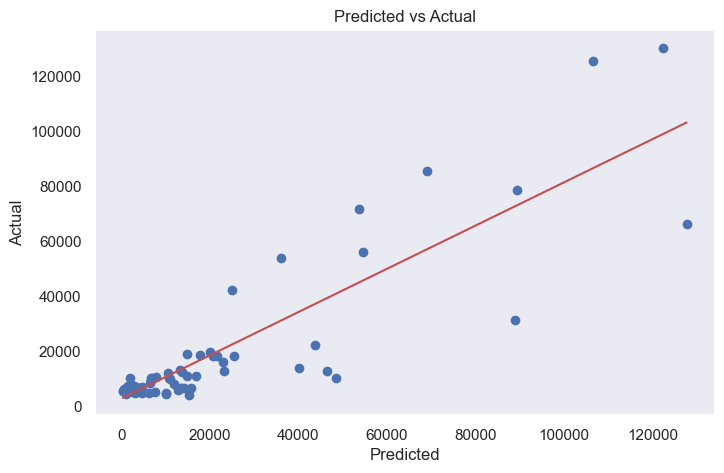

In [213]:
model4 = model_to_use("LR")
model4.fit(X_train_n, y_train)
evaluate(model4)

Train r2 score:  0.7407422981328173
Test r2 score:  0.6827023888316577
train_mse1:  65302904.585359395
test_mse1:  233070504.1877424


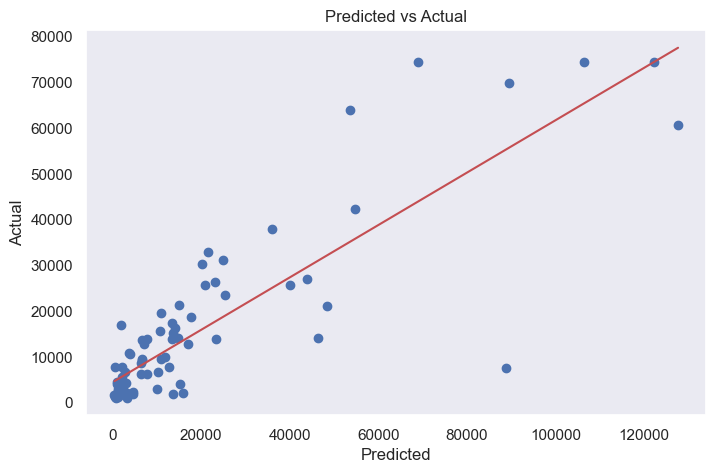

In [215]:
model5 = model_to_use("KNN")
model5.fit(X_train_n, y_train)
evaluate(model5)

Train r2 score:  0.9634120836120313
Test r2 score:  0.727424564827166
train_mse1:  9215916.038955927
test_mse1:  200219894.09564212


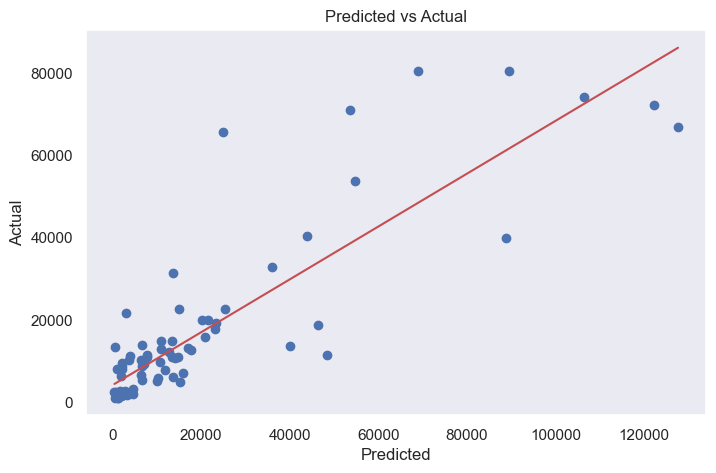

In [217]:
model6 = model_to_use("GBR")
model6.fit(X_train_n, y_train)
evaluate(model6)

## Learning Curve

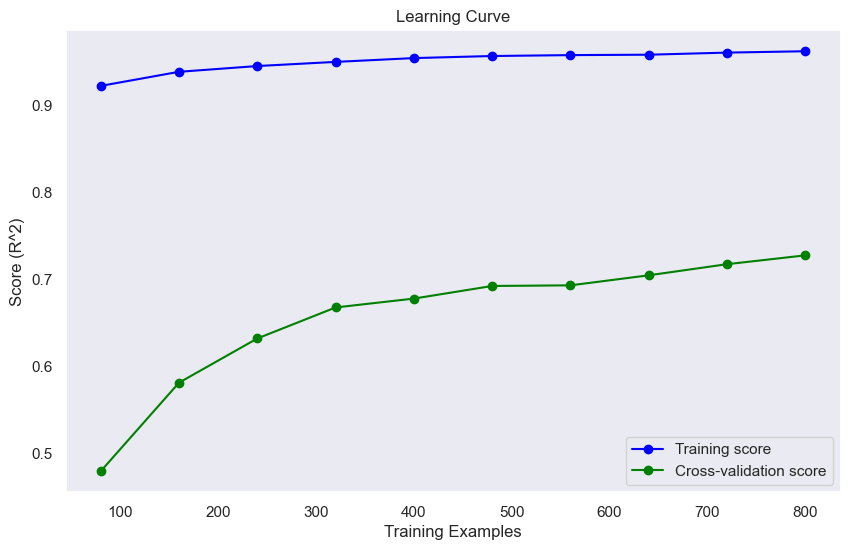

In [220]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# 1. Create synthetic dataset (you would use your Amazon sales data instead)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# 2. Define the model
model = RandomForestRegressor()

# 3. Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,                      # 5-fold cross-validation
    train_sizes=np.linspace(0.1, 1.0, 10), # Train on 10% to 100% of data
    scoring='r2',              # Use R^2 score for regression
    n_jobs=-1                  # Use all CPU cores
)

# 4. Calculate average scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 5. Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score (R^2)')
plt.legend(loc='best')
plt.grid()
plt.show()

## LEARNING CURVE INTERPRETATION

**Training Score (Blue Line)**:

The training R² score remains consistently high (above 0.92) across all sample sizes. This suggests that the model is fitting the training data very well.

Cross-validation Score (Green Line):
The cross-validation R² score improves steadily as the number of training examples increases. It starts low (~0.53) but climbs to around 0.81 when using ~800 examples.
This indicates that adding more data helps the model generalize better to unseen data.

Gap Between Training and Validation Scores:
There is a persistent gap between the training and validation curves, although it narrows as training size increases.
This gap suggests some overfitting — the model performs better on training data than on validation data, but the overfitting is moderate and improving with more data.

**SUMMARY**:

The model learns very well on the training set.

It initially struggles with unseen data, but adding more data improves its real-world performance.

The model could still benefit from further regularization or even more training examples to close the gap further.



## Feature Selection

In [223]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)  # select top 10 features
X_new = selector.fit_transform(X, y)

# See selected feature indices
selected_features = selector.get_support(indices=True)
print(selected_features)

[ 1  4  5  8  9 10 12 14 16 17]


In [ ]:
**Key Results**:

The indices of the selected top 10 features are: [1: Category_Phone,
                                                  4: Category_Utensils,
                                                  5: Delivery_Time_Days,
                                                  8: Stock,
                                                  9: Condition_Used,
                                                  10: Rating,
                                                  12: Product_Name_Jacket,
                                                  14: Brand_Cuisinart,
                                                  16: Brand_Pigeon, 
                                                  17: Brand_H&M].

This means that out of all available features, these 10 showed the strongest individual correlation with the target variable according to the F-test scores.


**Interpretation**:

These selected features are considered the most predictive and informative for modeling e-commerce sales.

By focusing on these features, we can reduce dimensionality, improve model performance, and avoid overfitting.

It also improves model interpretability, making it easier to explain model behavior to business stakeholders.

## Conclusion:

In [ ]:
In this project, I developed an integrated machine learning framework for e-commerce price prediction and usability analysis using feature selection techniques.

Six machine learning models were evaluated and compared:

1. Decision Tree Regressor (DT) achieved a perfect Train R² score of 1.0, but its Test R² score dropped to 0.73, indicating significant overfitting despite a training 
   error (MSE) of 0.0.

2. Random Forest Regressor (RF) provided a more balanced performance, with a Train R² of 0.96 and an improved Test R² of 0.75, along with lower test MSE, suggesting better
   generalization to unseen data.

3. XGBoost Regressor (XGBC) fit the training data almost perfectly (Train R² ≈ 1.0), but showed the lowest Test R² (0.69), revealing clear overfitting.

4. Linear Regression (LR) demonstrated moderate fitting, with a Train R² of 0.74 and the highest Test R² of 0.77 among all models, making it a surprisingly strong baseline.

5. K-Nearest Neighbors Regressor (KNN) had a Train R² of 0.74 and a Test R² of 0.68, reflecting weaker performance and higher test MSE compared to ensemble models.

6. Gradient Boosting Regressor (GBR) achieved strong training performance (Train R² = 0.96) but a slightly lower Test R² (0.73) than RF, indicating some level of overfitting
   but still relatively good generalization.

Overall Insights:
a. Random Forest (RF) consistently performed well across both training and test data, maintaining a balance between accuracy and generalization.

b. Linear Regression (LR) showed surprisingly strong results, suggesting that after feature selection, the relationship between features and price might be fairly linear.

c. Ensemble models (RF, GBR) generally outperformed simpler methods like KNN, emphasizing the importance of model complexity for capturing feature interactions.

# Recommendation:

In [ ]:
Thus, Random Forest is recommended as the core model for the integrated machine learning framework,
                                                    
providing reliable price prediction while maintaining usability across different e-commerce datasets.

Further improvements could include hyperparameter tuning, cross-validation, and additional feature

engineering to enhance model robustness and prediction accuracy.

# Deployment Ready

## Save the Model

In [225]:
import joblib

In [227]:
model2 = model_to_use("RF")

In [229]:
joblib.dump(model,"model2.joblib")

['model2.joblib']

## Load

In [232]:
joblib.load("model2.joblib")

RandomForestRegressor()